# Anáise exploratória de dados de uma empresa

Até este momento do curso, já passamos por assuntos que nos permitem realizar análise exploratória de uma planilha, disponível no google drive. A intenção aqui é, utilizando Python, plotar gráficos para analisar os dados, aplicando todos os conhecimentos vistos até o momento. Vamos lá?! 📊

# Fase inicial

A primeria coisa é sempre importar as bibliotecas que utilizaremos (vamos repetir essa informação até que seja automático em nossa cabeça 🤩 ), montar o drive no nosso código e selecionar o diretório e arquivo que vamos utilizar.

In [32]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

#montando o drive
drive.mount

#importar ( ou selecionar) a planilha com pandas:
planilha = pd.read_excel('/content/drive/MyDrive/controle_da_empresa.xlsx', None)


# Histograma com o total de vendas

A seguir, vamos plotar o histogram de uma das colunas para que possamos analisar os dados. Este tipo de gráfico nos ajudam a entender a distribuição de determinada variável em nosso conjunto de dados. Podem ser úteis ainda para identificar padrões, os dados muito discrepantes (*outliers*), sendo bastante utilizados na análise de dados.

In [34]:
#plotar Histograma

#Selecionar a planilha vendas, que consta no arquivo aberto
df = planilha['Vendas']

#visualizar as 5 primeiras linhas
df.head()



,Data da Venda,Item,Quantidade,Vendedor,Preço Unitário,Total de Vendas
85,2020-01-29,Filtro ND 5 Stop,2,Theo,1220,2440
86,2020-01-29,Lente 16-35mm f/2.8,2,Theo,8997,17994
87,2020-01-29,Filtro ND 2 Stop,1,Fernanda,1220,1220
88,2020-01-30,Filtro ND 3 Stop,2,Fernanda,1220,2440
89,2020-01-30,Filtro ND 5 Stop,2,Raquel,1220,2440


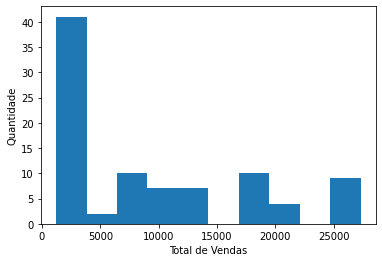

In [40]:
#Definindo o título e conjunto de dados a ser utilizado
plt.hist("Total de Vendas", data=df)
#definindo o títuto do eixo x do gráfico
plt.xlabel("Total de Vendas")
#definindo o títuto do eixo y do gráfico
plt.ylabel("Quantidade")
#mostrando o gráfico
plt.show()

# Gráfico de linha das vendas ao longo do tempo

O gráfico de linha é um tipo de gráfico que exibe informações com uma série de pontos de dados chamados de marcadores ligados por segmentos de linha reta, registrados ao longo do tempo. Ele é útili para analisar o comportamento dos gráficos ao longo de um período.

Para anaisar os dados com este tipo de gráfico, utilizaremos a coluna `Data da Venda`, que está armazenada como `String`, e precisa ser alterada para o tipo data.

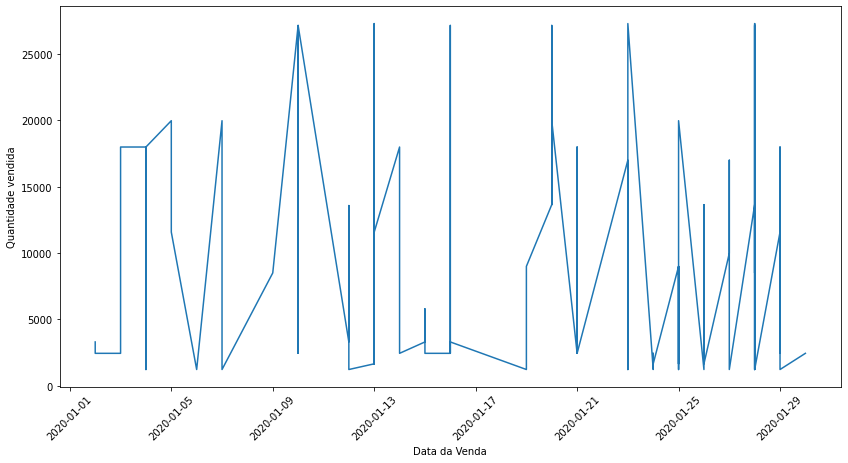

In [50]:
# rode a célula para transformar a coluna Datas para o formato datetime
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'], infer_datetime_format=True)

#Definindo os dados utilizados no gráfico de linha, no eixo X, no eixo Y e o conjunto de dados, respectivamente
plt.plot('Data da Venda', 'Total de Vendas', data = df)

#Título do eixo x:
plt.xlabel('Data da Venda')

#Título do eixo y:
plt.ylabel("Quantidade vendida")

#aumentas o tamanho do Gráfico
plt.rcParams['figure.figsize'] = (14,7)
plt.xticks(rotation=45)

plt.show()

# Gráfico de barras para os vendedores

O gráfico de barras nos ajuda principalmente na hora de representar variáveis discretas. Este gráfico é muito parecido com o histograma, mas tem objettivos distintos. No gráfico de barras, o tamanho das barras representam a proporção dos valores analisados. As barras podem ser verticais ou horizontais, e em alguns casos, são utilizadas barras agrupadas para facilitar a comparação entre os dados. Neste exercício, vamos utilizar apenas o gráfico de barras verticais, simples.



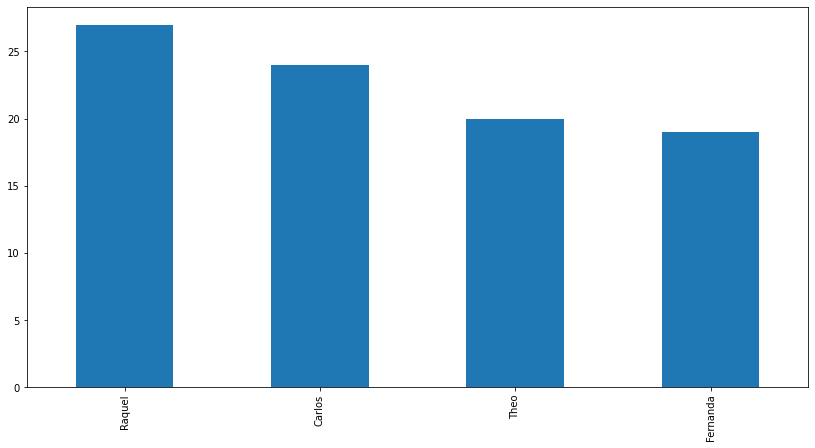

In [54]:
#É preciso contar os valores distintos para que o gráfico represente estes valores:
df['Vendedor'].value_counts().plot(kind='bar');
#com o comando acima já é possível plotar o gráfico com os dados já contados.

# Gráfico de pizza ou waffle para os produtos mais vendidos

O gráfico de pizza é bastante dispensável, apesar de bem popular. Mas é bom que evitemos utilizar, a menos que ele seja solicitado. Vamos mostrar então um novo gráfico (pelo menos foi novo para mim, pois eu nunca havia visto): o gráfico Waffle. Ele distribui os dados em quadradinhos coloridos que representam cada "categoria". Um porém, é que este gráfico não é nativo no colab, por isso é preciso instalar este pacote.

In [55]:
#instalando o pacote do Waffle:
!pip install pywaffle

     |████████████████████████████████| 565 kB 4.4 MB/s 


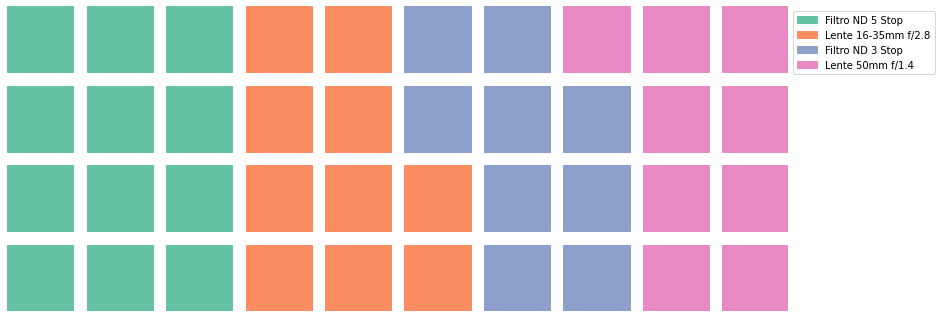

In [69]:
#Importar a biblioteca Waffle
from pywaffle import Waffle
#criar um diconário para armazenar as quantidade de itens vendidos:
itens = dict(df['Item'].value_counts())
itens
fig = plt.figure(
    FigureClass= Waffle,
    rows = 4,
    columns = 10,
    values={'Filtro ND 5 Stop':14,'Lente 16-35mm f/2.8':12,'Filtro ND 3 Stop':11,'Lente 50mm f/1.4':10},
    legend={'loc': 'upper left','bbox_to_anchor':(1, 1)}
)
fig.set_tight_layout(False)
plt.show()